In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("BankChurners.csv")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True, axis = 1)

In [5]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
df.shape

(10127, 20)

In [7]:
display(df.columns)
display(df.info())
display(df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


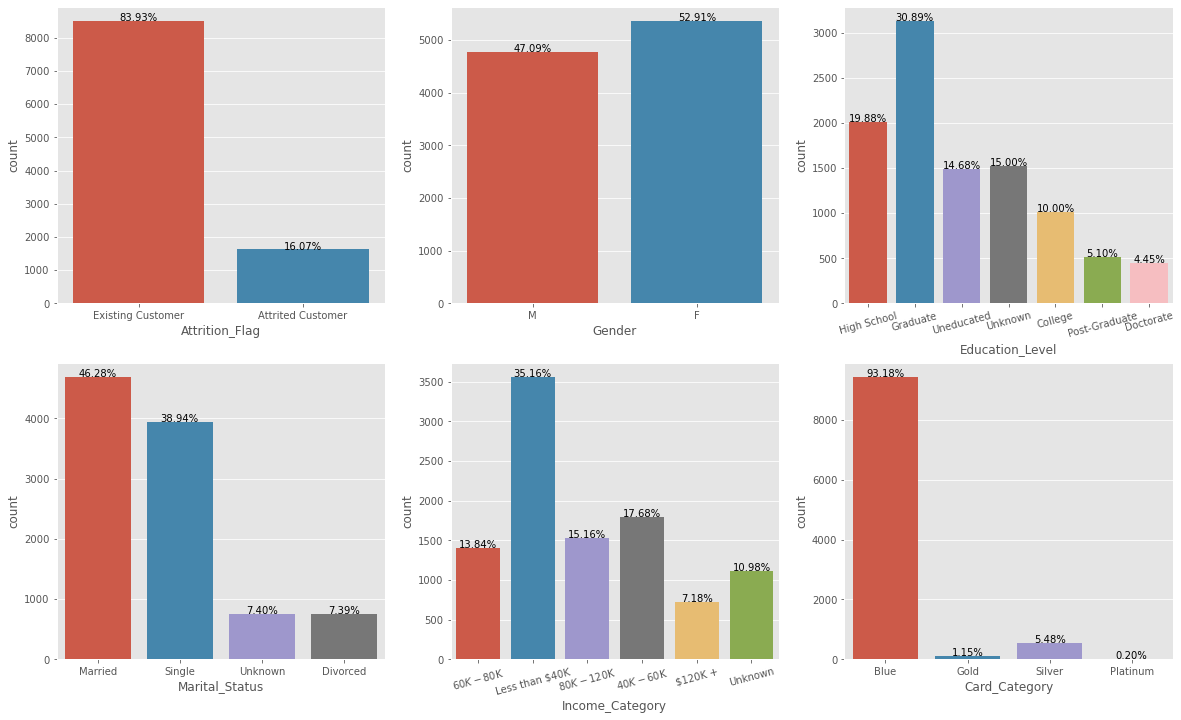

In [8]:
#類別不平衡
cats = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
def pltCountplot(cats):
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  
    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            ax = sns.countplot(cats[index], data=df, ax=axis[i][j])
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)    
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1
pltCountplot(cats)

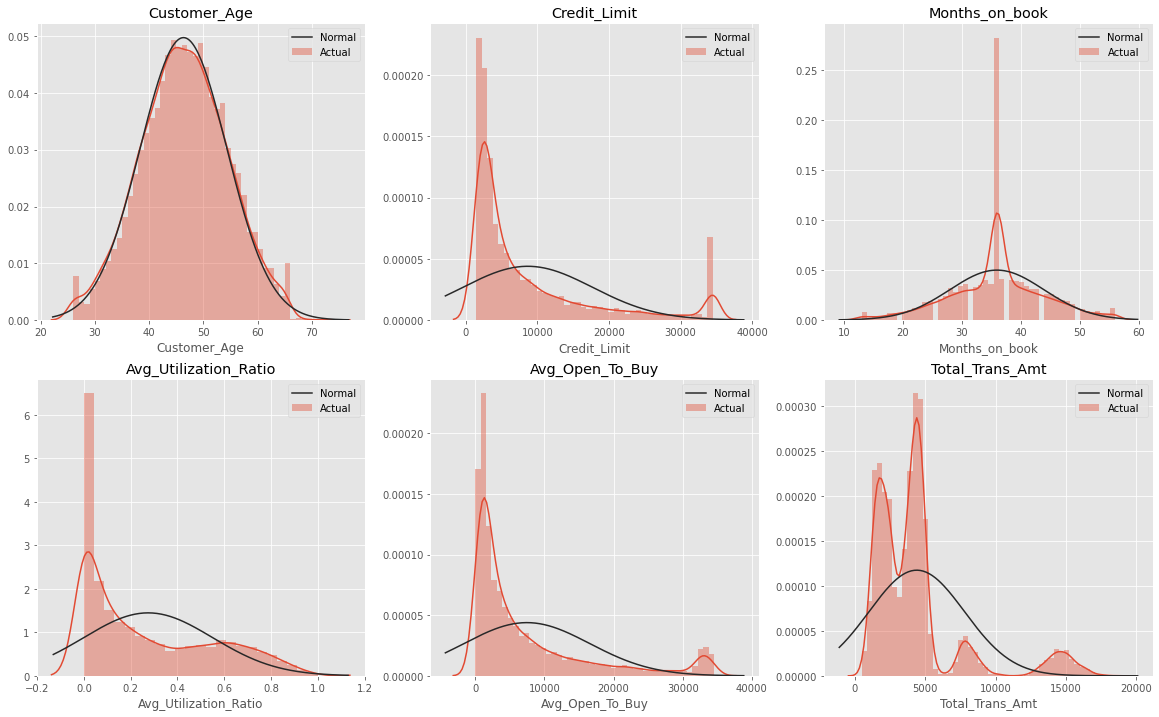

In [9]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

plotDistPlot(some_columns)

In [10]:
#右偏取log或標準化

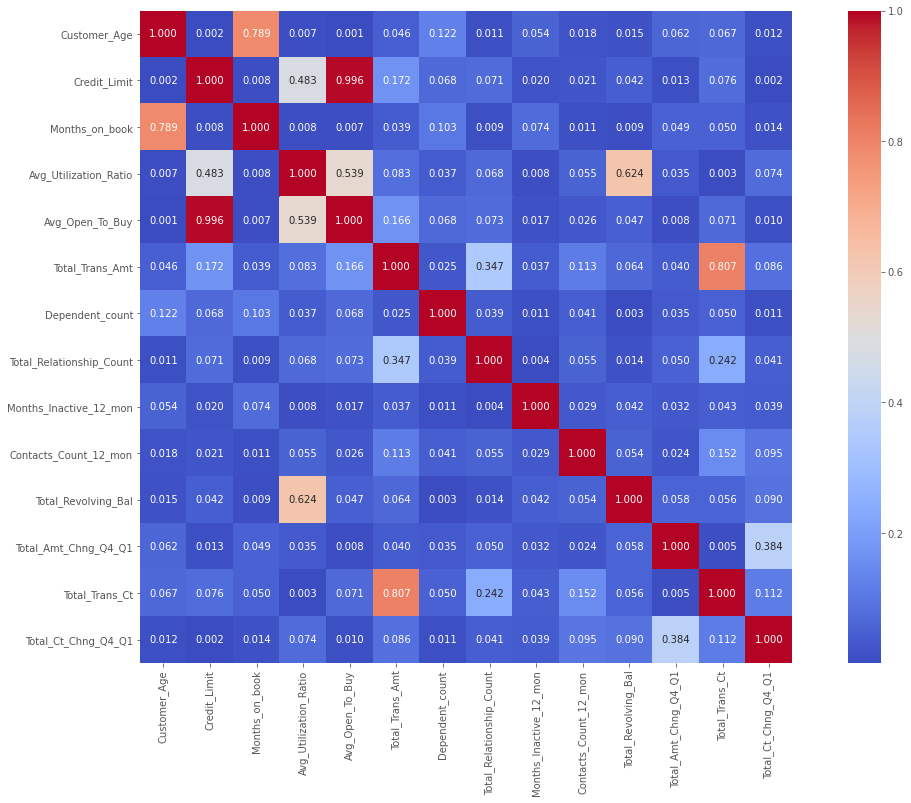

In [11]:
corr_data = df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

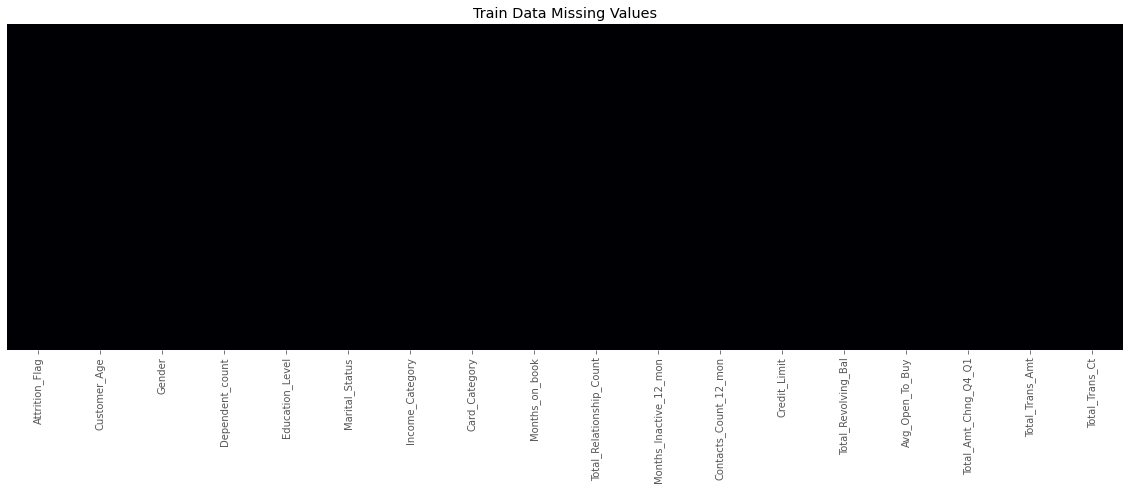

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Train Data Missing Values')
plt.xticks(rotation=90)

sns.heatmap(df.iloc[:,:-2].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax)

plt.show()

In [13]:
def catEncoding(data):
    for i in data.columns:
        if data[i].dtype == 'O':
            data[i] = data[i].astype('category').cat.codes
catEncoding(df)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int8   
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int8   
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int8   
 5   Marital_Status            10127 non-null  int8   
 6   Income_Category           10127 non-null  int8   
 7   Card_Category             10127 non-null  int8   
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [15]:
#處理
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('SMOTE Resampled dataset shape %s' % Counter(y_res))

SMOTE Resampled dataset shape Counter({1: 8500, 0: 8500})


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve, ShuffleSplit
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

In [17]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

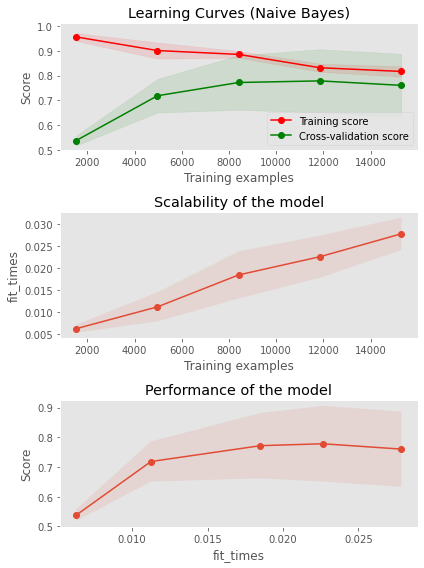

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_res, y_res, axes=axes[:], ylim=(0.5, 1.01),
                    cv=10, n_jobs=-1)
fig.tight_layout()
plt.show()

In [19]:
gnb = GaussianNB()
rfc = RandomForestClassifier()

In [20]:
#切資料
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
print('Gaussian NB', '\n', classification_report(y_pred, y_test))

Gaussian NB 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      2289
           1       0.78      0.84      0.81      1961

    accuracy                           0.81      4250
   macro avg       0.81      0.82      0.81      4250
weighted avg       0.82      0.81      0.82      4250



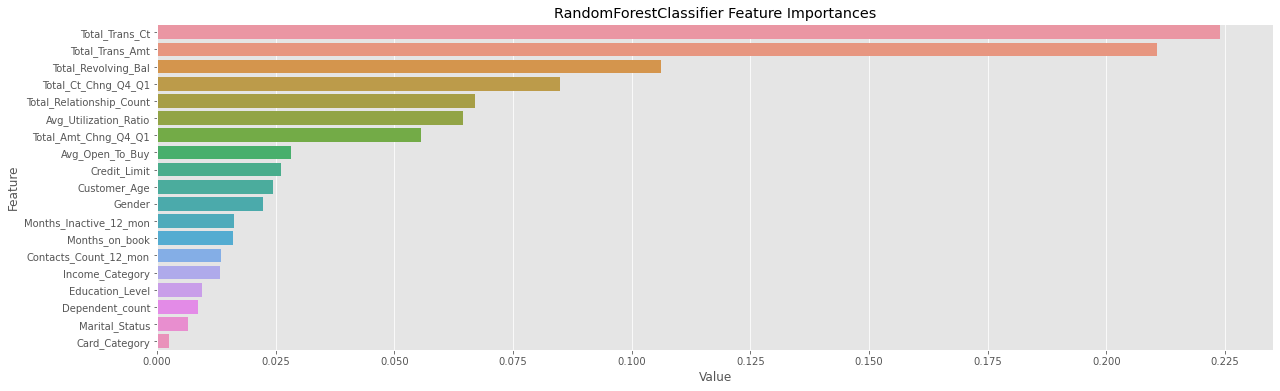

In [21]:
rfc.fit(X_train, y_train)

importance_features = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns)), columns=['Value', 'Feature'])

importance_features = importance_features.sort_values('Value', ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(y="Feature", x="Value", ax=ax,
            data=importance_features)
current_model_name = rfc.__class__.__name__
ax.set(title=f'{current_model_name} Feature Importances')
ax.xaxis.set_major_locator(MaxNLocator(nbins=11))

In [22]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(rfc, estimator = 'feature_importances_', threshold = 0.05, prefit=True)
feature_idx = model.get_support()
feature_names = X_res.columns[feature_idx]
X1 = model.transform(X_res)
X1 = pd.DataFrame(X1, columns= feature_names)

In [23]:
X1

,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5.0,777.0,1.335000,1144.0,42.0,1.625000,0.061000
1,6.0,864.0,1.541000,1291.0,33.0,3.714000,0.105000
2,4.0,0.0,2.594000,1887.0,20.0,2.333000,0.000000
3,3.0,2517.0,1.405000,1171.0,20.0,2.333000,0.760000
4,5.0,0.0,2.175000,816.0,28.0,2.500000,0.000000
...,...,...,...,...,...,...,...
16995,4.0,0.0,0.540445,995.0,25.0,0.409168,0.000000
16996,3.0,0.0,0.766447,1150.0,25.0,0.395035,0.000000
16997,3.0,0.0,0.583349,1681.0,31.0,0.559984,0.000000
16998,4.0,2480.0,1.034131,2953.0,53.0,0.729936,0.234699


In [24]:
#再切資料
X_train, X_test, y_train, y_test = train_test_split(X1, y_res, test_size=0.25, random_state=0)

gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
print('Gaussian NB', '\n', classification_report(y_pred, y_test))

Gaussian NB 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2208
           1       0.78      0.81      0.80      2042

    accuracy                           0.80      4250
   macro avg       0.80      0.80      0.80      4250
weighted avg       0.80      0.80      0.80      4250



In [25]:
#Train參數
var_smoothing = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
param_grid = dict(var_smoothing = var_smoothing)

grid_search = GridSearchCV(gnb, param_grid, scoring="roc_auc", n_jobs=-1, cv=10)
grid_result = grid_search.fit(X_train, y_train)

gnb.set_params(**grid_search.best_params_)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Gussian NB', '\n', classification_report(y_test, y_pred))

Gussian NB 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      2126
           1       0.81      0.78      0.80      2124

    accuracy                           0.80      4250
   macro avg       0.80      0.80      0.80      4250
weighted avg       0.80      0.80      0.80      4250

